In [ ]:

import numpy as np
def Linear_Model_Generator(X,y,tr_size):
    from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
    from sklearn.model_selection import train_test_split
    X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=tr_size,random_state=101)

    print("X_train shape: ",X_train.shape)
    print("X_test shape: ",X_test.shape)

    print('______Building Model______')
    from sklearn.linear_model import LinearRegression
    model=LinearRegression()
    model.fit(X_train,y_train)

    pred=model.predict(X_test)

    print("Mean absolute error:", mean_absolute_error(y_test,pred))
    print("Residual sum of squares:", mean_squared_error(y_test,pred))
    print("Root Residual sum of squares:", np.sqrt(mean_squared_error(y_test,pred)))
    print("R2-score:", r2_score(y_test,pred))

In [10]:

url='https://raw.githubusercontent.com/ibm-ice/Data-Exchange/refs/heads/main/FuelConsumptionCo2.csv'
import pandas as pd
df=pd.read_csv(url)
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [11]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [12]:
cdf=df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


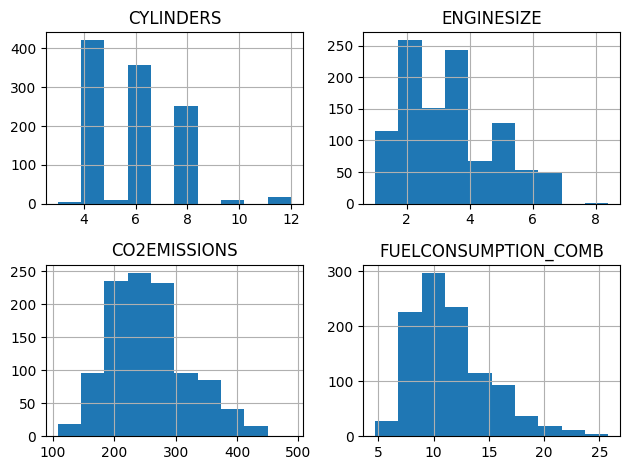

In [20]:
viz=cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]

import matplotlib.pyplot as plt
viz.hist()
plt.tight_layout()
plt.show()

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


X=cdf[['ENGINESIZE']]
y=cdf[['CO2EMISSIONS']]
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.33,random_state=42)

# import ml model
linmodel = LinearRegression()

# fit the model
linmodel.fit(X_train,y_train)

# prediction
y_pred=linmodel.predict(X_test)
# accuracy
print("R2-score: ",r2_score(y_test,y_pred))
r2_score(y_test,y_pred)

R2-score:  0.7635865736239825


0.7635865736239825

In [22]:
linmodel_coef=np.squeeze(linmodel.coef_)
print("Coefficient: ",linmodel_coef)


Coefficient:  38.804023092673226


In [23]:
linmodel_intercept=np.squeeze(linmodel.intercept_)
print("Intercept: ",linmodel_intercept)

Intercept:  126.21216462454424


Text(0, 0.5, 'Emission')

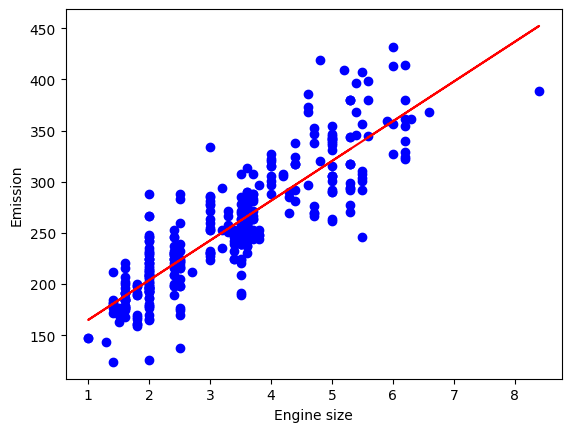

In [24]:
plt.scatter(X_train.ENGINESIZE,y_train,color='blue')
plt.plot(X_train,linmodel.coef_[0][0]*X_train+linmodel.intercept_[0],'-r') # y = mx + c {m = slope}
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [ ]:
plt.show(url) #hi